<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [17]:
import pandas as pd

Load the dataset into a dataframe.


In [18]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [20]:
print(df[df['ConvertedComp'].isnull()])

       Respondent                      MainBranch Hobbyist  \
35             80  I am a developer by profession      Yes   
50            111  I am a developer by profession      Yes   
56            119  I am a developer by profession       No   
79            176  I am a developer by profession      Yes   
102           220  I am a developer by profession       No   
...           ...                             ...      ...   
11365       25078  I am a developer by profession      Yes   
11370       25087  I am a developer by profession      Yes   
11377       25101  I am a developer by profession      Yes   
11380       25109  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
35     Less than once a month but more than once per ...   
50                                                 Never   
56                               Less than once per year   
79     Less tha

Plot the histogram for the column `ConvertedComp`.


In [21]:
df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')

In [22]:
df = df.dropna(subset=['ConvertedComp'])

In [23]:
df['ConvertedComp'] = df['ConvertedComp'].astype(int)

<AxesSubplot:xlabel='ConvertedComp'>

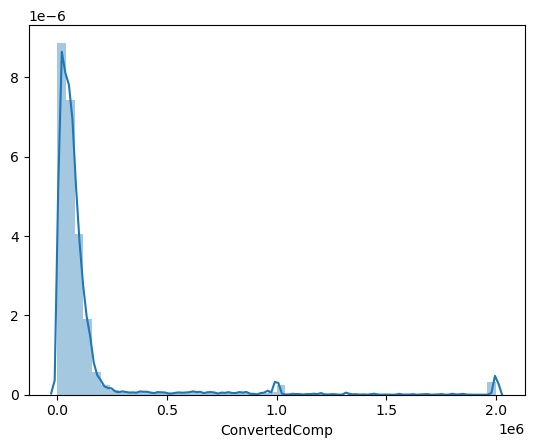

In [24]:
import seaborn as sns 
sns.distplot(df['ConvertedComp'], kde = True)

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

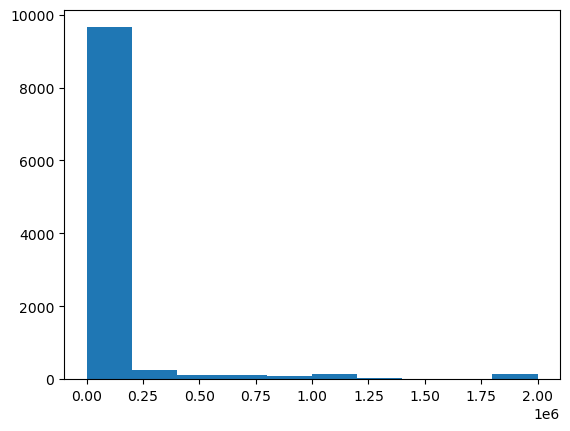

In [25]:
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp']) 

In [26]:
df['ConvertedComp'].dropna(axis=0,inplace=True) 
print("ConvertedComp Median:", df['ConvertedComp'].median())

ConvertedComp Median: 57745.0


What is the median of the column `ConvertedComp`?


In [27]:
df['Gender'].value_counts()


Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

How many responders identified themselves only as a **Man**?


In [28]:
df_woman=df[df['Gender']=='Woman']
print("Woman Median:", df_woman['ConvertedComp'].median())

Woman Median: 57708.0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


(array([1.929e+03, 4.968e+03, 2.406e+03, 7.880e+02, 2.100e+02, 4.800e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

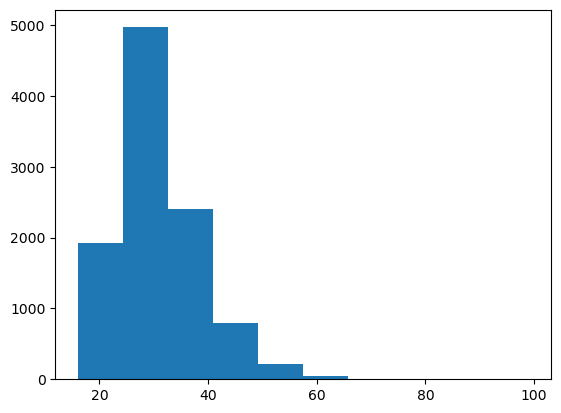

In [30]:
plt.hist(df['Age']) 

Plot a histogram of the column `Age`.


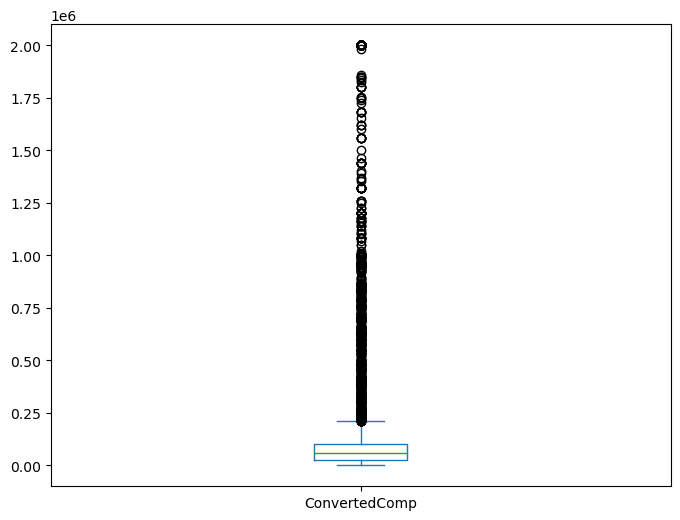

In [31]:
df_cv = pd.DataFrame(data=df['ConvertedComp'])
df_cv.plot(kind='box', figsize=(8,6))
plt.show()# your code goes here

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [32]:
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)

The Inter Quartile Range for ConvertedComp: 73132.0


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 209698.0
Lower Bound: -82830.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11392    False
11393    False
11394    False
11395    False
11396    False
Name: ConvertedComp, Length: 10582, dtype: bool

Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()

count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013482,0.002181,-0.016178,0.007031,0.002394
CompTotal,-0.013482,1.000000,0.001037,0.003467,0.006698,0.006949
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.016178,0.003467,0.021143,1.000000,0.032463,0.031592
CodeRevHrs,0.007031,0.006698,-0.033865,0.032463,1.000000,-0.015742
Age,0.002394,0.006949,0.105386,0.031592,-0.015742,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
